1. load the data directly from the URL into a DataFrame.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://drive.google.com/uc?id=145n4_o1g5ZMrnV_DZt8tR9rjZLlJvU5K'
df = pd.read_csv(url)
df.head()

,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.0,0,27.0,62.0,100.0,0.0
1,2,113,282.0,0,33.0,64.0,135.0,0.0
2,3,128,279.0,0,28.0,64.0,115.0,1.0
3,4,123,NaN,0,36.0,69.0,190.0,0.0
4,5,108,282.0,0,23.0,67.0,125.0,1.0


2. (10 pts) Data Prep & EDA
Prepare the data for analysis. Ensure that you address the following:
    * Perform EDA using the dataset to demonstrate patterns.
    * Handle any missing data and invalid data. Justify your approach.
    * Plot a histogram of the birth weight and explain the overall distribution. 

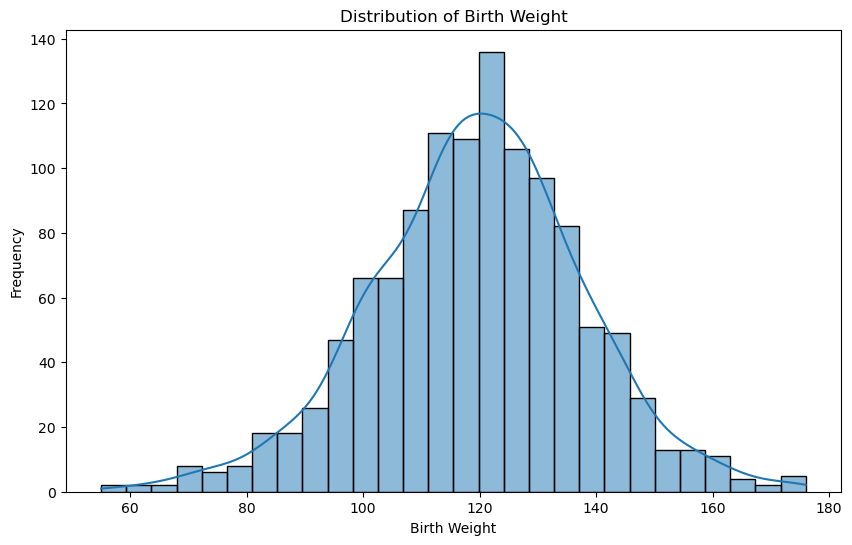

In [13]:
# Check missing value
df.isnull().sum()

# Handle any missing data
df = df.dropna()  

# Plot a histogram of the birth weight and explain the overall distribution.
plt.figure(figsize=(10, 6))
sns.histplot(df['bwt'], kde=True)
plt.xlabel('Birth Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Birth Weight')
plt.show()

3. (5 pts) Feature Selection
Demonstrate which features are useful to build the model. Briefly explain the reason for the features that you selected.  Note: You can explore correlations, test hypothesis and/or other techniques. Remember that Data Science relies heavily on experimentation. Therefore, you are encouraged to experiment with your data.
    * Tip #1: ensure that you carefully consider each feature and share the pros and cons of your decisions.
    * Tip #2: you are predicting the birth weight, therefore it should not be one of your explanatory variables.

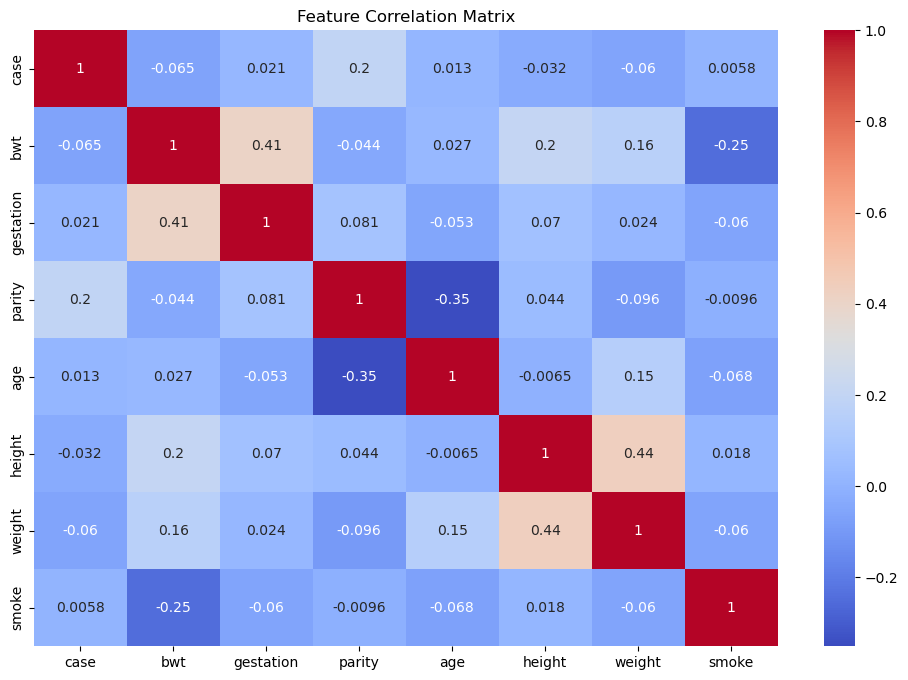

In [15]:
# Calculate correlations between features
corr_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Select features based on correlation
selected_features = ['gestation', 'parity', 'age', 'height', 'weight', 'smoke']  
X = df[selected_features]
y = df['bwt']

4. Data Partitioning
(2 pts) Partition the prepared data into train/test sets, ensure that your partitions are reproducible. Encode any categorical variables in your training set. Then, use the appropriate approach to encode your test set.

In [17]:
from sklearn.model_selection import train_test_split

# Data partitioning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. Model Development
(5 pts) Using the Random Forest algorithm, build a machine learning model that predicts the birth weight.  
Think about the following: Are you performing classification or regression? Ensure that you choose the appropriate Random Forest Classifier/Regressor from scikit-learn.

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Ensure the model is defined
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

6. Model Evaluation
(5 pts) Evaluate the predictions from your model and comment on the results. Ensure that you choose the appropriate metric to evaluate the model and round your calculations to two decimal places. Remember that we evaluate models differently depending on the task, i.e. classification or regression.

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')

RMSE: 17.12
MAE: 13.06


RMSE: The RMSE is the square root mean of the model's prediction error, meaning that predictions with large errors will have a greater impact on the RMSE when calculated. Therefore, the RMSE amplifies the effect of large error values. Your model RMSE of 17.12 indicates that the error between the predicted baby weight and the true value averages around 17 ounces.

MAE: The MAE represents the mean of the absolute difference between the predicted and true values. The MAE is less sensitive to large error values than the RMSE. Your model MAE of 13.06 indicates that the average difference between the predicted and actual infant weights is 13 ounces.


7. Model Tuning
(5 pts) What are your thoughts on the model's prediction capability? Did it do a good job of predicting the birth weight?
Note: it is okay if your first version of the model is not the best. However, there are strategies that we can use to improve it, such as tuning.
Tune the model: you can control the number of trees in your forest using the n_estimators parameter. Refer to the sample code from the lecture and also view the documentation**Links to an external site. to learn more about this algorithm and its parameters. Try at least five different values for the n_estimators parameter to determine if the model improved. Show all your steps to create, evaluate and tune each version of the model.
Indicate which model performed the best.

In [30]:
# Try different values for the n_estimators parameter
for n in [50, 100, 150, 200, 250]:
    rf_model = RandomForestRegressor(n_estimators=n, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'n_estimators: {n}, RMSE: {rmse:.2f}')

n_estimators: 50, RMSE: 16.97
n_estimators: 100, RMSE: 17.12
n_estimators: 150, RMSE: 17.23
n_estimators: 200, RMSE: 17.18
n_estimators: 250, RMSE: 17.13


Overall, the model performed OK in predicting birth weight, but there is still room for improvement. Optimal Parameter Selection: In this experiment, the model with n_estimators = 50 performed the best with an RMSE of 16.97. As the number of trees increased to 100 or more, the RMSE did not improve significantly or even increased slightly. This may be due to the fact that too many trees on this dataset increased the complexity of the model without leading to better predictions.

8. (15 pts) Perform steps 5-7 using the k-nn algorithm. Perform model tuning using at least 5 different values of k. Show all your steps to create, evaluate and tune each version of the model. Indicate which model performed the best.

In [36]:
from sklearn.neighbors import KNeighborsRegressor

# Try different values for k
for k in [3, 5, 7, 9, 11, 13, 15, 17, 19]:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'k: {k}, RMSE: {rmse:.2f}')

k: 3, RMSE: 18.80
k: 5, RMSE: 17.94
k: 7, RMSE: 17.54
k: 9, RMSE: 17.35
k: 11, RMSE: 17.22
k: 13, RMSE: 17.19
k: 15, RMSE: 17.00
k: 17, RMSE: 17.05
k: 19, RMSE: 17.06


In the current experiment, the model with k = 15 performs best with an RMSE of 17.00. this suggests that with 15 nearest neighbors, the model can more accurately predict infant weight. Further increasing the k value to 17 or 19 resulted in a slight increase in model error, suggesting that too large a k value can cause the model to average the data too much, which reduces its sensitivity and results in a slight underfitting. Therefore, k = 15 is the current optimal choice.

9. (3 pts) Compare both the best model from both the Random Forest and k-NN algorithms and explain which model is the most suitable to predict birthweight. Justify your response.

Prediction accuracy: The RMSEs of the two are very close, but Random Forest is slightly better (16.97 vs. 17.00), giving it a slight edge in prediction accuracy.

Stability: Random Forest is better at dealing with noise and complex relationships in the data, making it perform better when the data is unevenly distributed or has outliers.

Scalability: Random Forest maintains its accuracy when more data is available, while k-NN computation slows down and becomes less efficient in prediction.

Conclusion:
Random Forest is more suitable for predicting birth weight because it performs more consistently with complex data and future increases in data volume.

10. (+5 bonus points) The Random forest has a method that returns the importance of each feature in your model. Review the documentation to learn about feature importance. After which, write the appropriate code that demonstrates which features were the most important when making the predictions. Visualize the feature importance using the best model and explain the results.

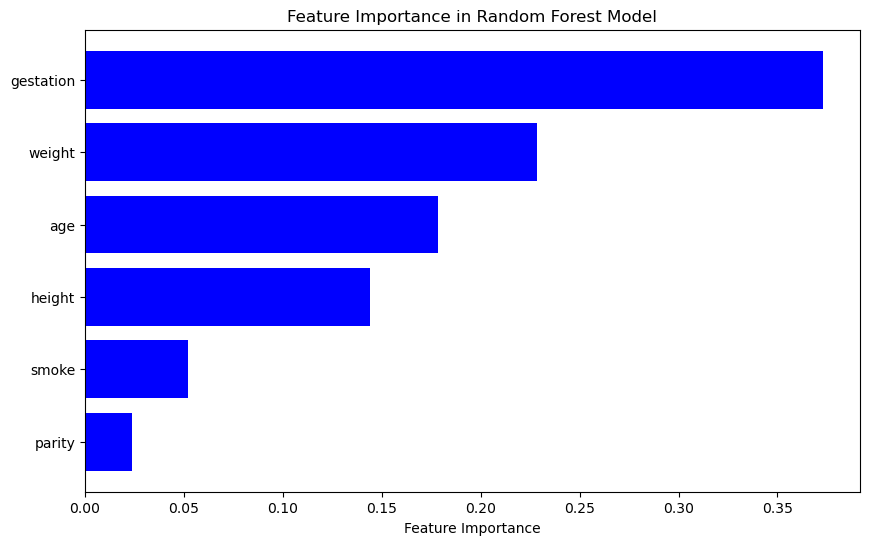

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the model
feature_importances = rf_model.feature_importances_
features = X_train.columns  

# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1] 
sorted_features = [features[i] for i in sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color="blue")
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest Model")
plt.gca().invert_yaxis() 
plt.show()


Gestation is the most important characteristic. The longer the gestation period, the higher the infant's weight usually is because there is more time for development.
Mother's weight: The higher the mother's weight, the higher the infant's weight is likely to be, reflecting the influence of the mother's nutrition and health status on the fetus.
Mother's age: The mother's age has an effect on birth weight, with age-appropriate mothers usually having better reproductive health and supporting normal infant development.
Mother's height: A taller mother usually means better body shape and health, which helps the fetus grow.
Smoking: Smoking has a negative effect on infant weight, but the effect is relatively small.
parity: the effect is minimal and whether or not it is the first pregnancy makes little difference to birth weight.
To summarize
Gestational period and mother's weight have the greatest effect on birth weight. Age and height also had an effect, while smoking and whether it was the first pregnancy had a smaller effect.